In [1]:
import tkinter as tk
from tkinter import ttk
import csv

csv_file_path = "heart_disease.csv"

In [3]:
def on_predict_append():
    # Retrieve values from the text fields
    age_value = age_entry.get()
    sex_value = sex_entry.get()
    cp_value = cp_entry.get()
    trestbps_value = trestbps_entry.get()
    chol_value = chol_entry.get()
    fbs_value = fbs_entry.get()
    restecg_value = restecg_entry.get()
    thalach_value = thalach_entry.get()
    exang_value = exang_entry.get()
    oldpeak_value = oldpeak_entry.get()
    slope_value = slope_entry.get()
    ca_value = ca_entry.get()
    thal_value = thal_entry.get()
    target_value = target_entry.get()

    # Here, you can perform any prediction or data processing you need
    # For this example, I'll just append the values to the CSV file.
    with open(csv_file_path, 'a', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow([age_value, sex_value, cp_value, trestbps_value, chol_value,
                             fbs_value, restecg_value, thalach_value, exang_value, oldpeak_value,
                             slope_value, ca_value, thal_value, target_value])

    print("Values appended successfully.")

    # Clear the text entry fields after processing
    age_entry.delete(0, tk.END)
    sex_entry.delete(0, tk.END)
    cp_entry.delete(0, tk.END)
    trestbps_entry.delete(0, tk.END)
    chol_entry.delete(0, tk.END)
    fbs_entry.delete(0, tk.END)
    restecg_entry.delete(0, tk.END)
    thalach_entry.delete(0, tk.END)
    exang_entry.delete(0, tk.END)
    oldpeak_entry.delete(0, tk.END)
    slope_entry.delete(0, tk.END)
    ca_entry.delete(0, tk.END)
    thal_entry.delete(0, tk.END)
    target_entry.delete(0, tk.END)

    print("Values appended successfully.")

# Create the main application window
app = tk.Tk()
app.title("Prediction Form")

# Create labels with custom style (blue color)
style = ttk.Style()
style.configure("Blue.TLabel", foreground="blue", background="white")
labels = ["age", "sex", "cp", "trestbps", "chol",
          "fbs", "restecg", "thalach", "exang", "oldpeak",
          "slope", "ca", "thal", "target"]
label_widgets = [ttk.Label(app, text=label_text.capitalize(), style="Blue.TLabel") for label_text in labels]

# Create text entry fields (14 in this case)
age_entry = tk.Entry(app)
sex_entry = tk.Entry(app)
cp_entry = tk.Entry(app)
trestbps_entry = tk.Entry(app)
chol_entry = tk.Entry(app)
fbs_entry = tk.Entry(app)
restecg_entry = tk.Entry(app)
thalach_entry = tk.Entry(app)
exang_entry = tk.Entry(app)
oldpeak_entry = tk.Entry(app)
slope_entry = tk.Entry(app)
ca_entry = tk.Entry(app)
thal_entry = tk.Entry(app)
target_entry = tk.Entry(app)

# Create the "Predict Append" button and associate it with the on_predict_append() function
predict_button = tk.Button(app, text="Append", command=on_predict_append)

# Grid layout
for idx, entry in enumerate(label_widgets):
    entry.grid(row=idx, column=0, padx=10, pady=5, sticky="w")

    # Place the corresponding entry fields
    entry_field = eval(f"{labels[idx]}_entry")  # Using eval to get the respective entry field
    entry_field.grid(row=idx, column=1, padx=10, pady=5, sticky="ew")

# Place the "Predict Append" button
predict_button.grid(row=len(labels), column=0, columnspan=2, padx=10, pady=10)

# Start the main event loop
app.mainloop()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
import time

In [5]:
start_time = time.time()

In [8]:

data = pd.read_csv("heart_disease.csv")
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [9]:
data['age_thalach_interaction'] = data['age'] * data['thalach']
# Print the first few rows of the dataset to see the added interaction term
print("\nDataset with Interaction Term:")
print(data.head())


Dataset with Interaction Term:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  age_thalach_interaction  
0   0     1       1                     9450  
1   0     2       1                     6919  
2   0     2       1                     7052  
3   0     2       1                     9968  
4   0     2       1                     9291  


In [11]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

# Display descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
print(data.describe())

# Display the value counts of the target variable
print("\nValue counts of the target variable:")
print(data['target'].value_counts())

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  age_thalach_interaction  
0   0     1       1                     9450  
1   0     2       1                     6919  
2   0     2       1                     7052  
3   0     2       1                     9968  
4   0     2       1                     9291  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ----

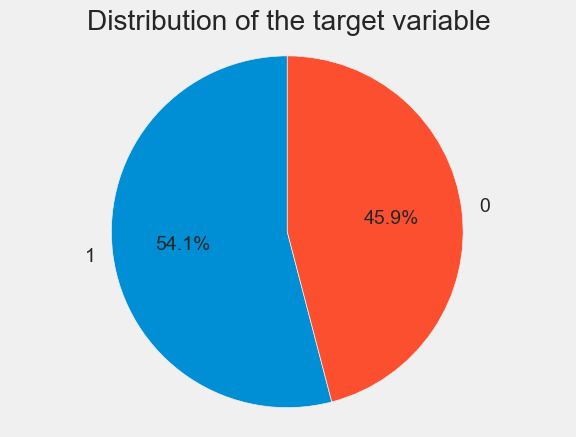

In [12]:
ratio = data['target'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')
plt.title("Distribution of the target variable")
plt.show()

In [13]:
print("\nMissing values in the dataset:")
print(data.isna().sum())


Missing values in the dataset:
age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
target                     0
age_thalach_interaction    0
dtype: int64


In [16]:
categorical_val = []

continuous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
        print("categorical_val:",categorical_val)
    else:
        continuous_val.append(column)
        print("continuous_val",continuous_val)

continuous_val ['age']
categorical_val: ['sex']
categorical_val: ['sex', 'cp']
continuous_val ['age', 'trestbps']
continuous_val ['age', 'trestbps', 'chol']
categorical_val: ['sex', 'cp', 'fbs']
categorical_val: ['sex', 'cp', 'fbs', 'restecg']
continuous_val ['age', 'trestbps', 'chol', 'thalach']
categorical_val: ['sex', 'cp', 'fbs', 'restecg', 'exang']
continuous_val ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_val: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
categorical_val: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']
categorical_val: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_val: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous_val ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'age_thalach_interaction']
